# Epidemiologi
## 1. Oppgave 8.21 i boka
### a)
En syk person vil smitte b * S(t) personer, det fører til at I(t) syke personer vil smitte b * S(t)I(t) personer. Det er minus forran uttrykket fordi S'(t) forteller oss hvordan antallet utsatte forandre seg, og S'(t) reduseres.

Siden det er f prosent av de syke som blir friske, vil f * I(t) fortelle oss hvor mange syke som blir friske. R'(t) forteller oss hvor mange personer som har blitt friske.
### b)
Vi vet at S(t) + R(t) + I(t) = N fordi befolkningen N er delt i de tre gruppene S, R og I, og N er konstant. Hvis vi deriverer hver av sidene i likningen vil vi få S'(t) + R'(t) + I'(t) = 0.

Ved bruk av likningen over kan vi finne et utrykk for I'(t).

    S'(t) + R'(t) + I'(t) = 0 
    I'(t) = - S'(t) - R'(t)
    I'(t) = b * S(t)I(t) - f * I(t)
### c)


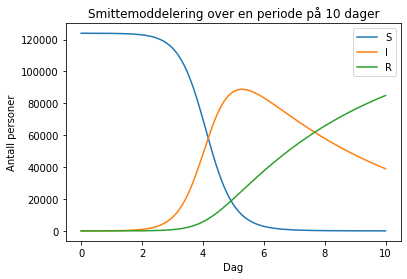

In [16]:
from pylab import*

N = 124000

n = 10000
t = linspace(0,10,n)
dt = t[1] - t[0]

S = zeros(n)
I = zeros(n)
R = zeros(n)

b = 2E-5
f = 0.2
S[0] = N - 10
I[0] = 10

for i in range(n - 1):
    S[i+1] = S[i] - dt*b*S[i]*I[i]
    I[i+1] = I[i] + dt*(b*S[i]*I[i] - f*I[i])
    R[i+1] = R[i] + dt*f*I[i]

plot(t,S,t,I,t,R)
title("Smittemoddelering over en periode på 10 dager")
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
show()

### d)

In [27]:
from pylab import*

def SIR(n,b,f,S0,I0,R0):
    t0 = 0
    t1 = 10
    t = linspace(t0,t1,n)
    dt = t[1] - t[0]
    
    S = zeros(n)
    I = zeros(n)
    R = zeros(n)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(n - 1):
        S[i+1] = S[i] - dt*b(t[i])*S[i]*I[i]
        I[i+1] = I[i] + dt*(b(t[i])*S[i]*I[i]-f(t[i])*I[i])
        R[i+1] = R[i] + dt*f(t[i])*I[i]
    return t,S,I,R

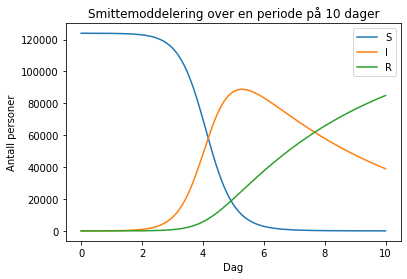

In [28]:

def f(t):
    return 0.2
def b(t):
    return 2E-5

n = 10000
N = 124000
S0 = N - 10
I0 = 10
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
title("Smittemoddelering over en periode på 10 dager")
show()

### e)

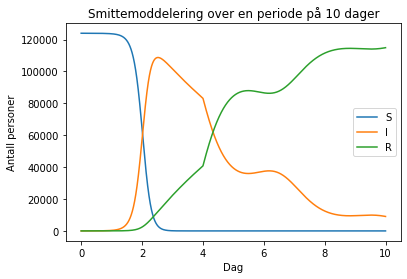

In [29]:

def f(t):
    if t < 4:
        return 0.2
    else:
        return 0.4 + 0.5*sin(0.6*pi*t)

def b(t):
    return 2E-5*(t + 1)*exp(-0.01*t**2)

n = 10000
N = 124000
S0 = N - 10
I0 = 10
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
title("Smittemoddelering over en periode på 10 dager")
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
show()

## 2./3. Smittede i Norge av Corona

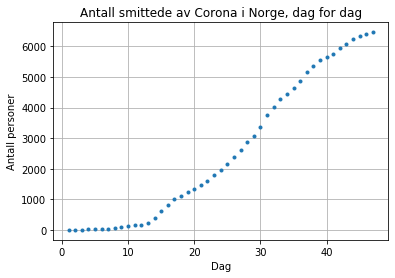

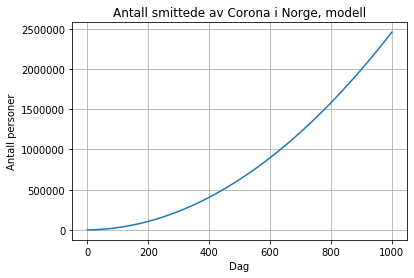

In [30]:
from pylab import*

data = loadtxt('coronatall.txt',delimiter=' ')
loadtxt

dag = data[:,0]
antall = data[:,1]
mdag = linspace(0, 1000)

p3 = polyfit(dag, antall, 2)

plot(dag,antall,'.')
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, dag for dag")
grid()
show()

plot(mdag,polyval(p3,mdag))
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, modell")
grid()
show()

## 4.

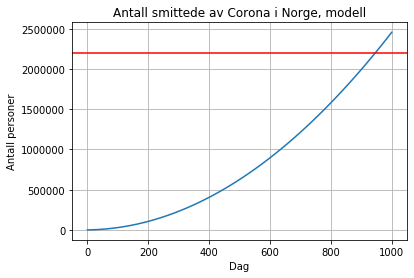

In [31]:
plot(mdag,polyval(p3,mdag))
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, modell")
axhline(y=2200000, color="red")
grid()
show()

I følge modellen min vil det være 2,2 millioner mennesker smittet av corona ca 950 dager etter førse meldte smittede.

## 5.

/Users/mathildemills/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/mathildemills/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/mathildemills/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


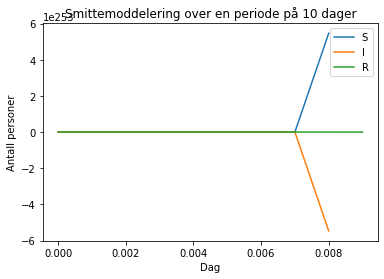

In [41]:
def f(t):
    if t < 4:
        return 0.2
    else:
        return 0.4 + 0.5*sin(0.6*pi*t)

def b(t):
    if t < 38:
        return 0.7
    else:
        return 2E-5*(t + 1)*exp(-0.01*t**2)

# 2E-5*(t + 1)*exp(-0.01*t**2)

n = 10000
N = 5500000
S0 = N - 1
I0 = 1
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
title("Smittemoddelering over en periode på 10 dager")
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
show()